# Introduction to AEWs and ERA5 Data
## Written by Quinton Lawton, University of Miami
## For Brooke Weiser

#### Potential modules to install
#### In a terminal window on Ida type the following commands and follow the prompts 
- conda install netcdf4
- conda install scipy 

Maybe more... reach out if things do not appear to be working properly 

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pickle

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from datetime import timedelta, datetime

from AEW_module import season, AEW, AEW_CCKW #Note: the AEW_module.py object has to be located in same directory as this file

## This notebook will do the following:

    1) Load in my AEW data for a sample year (in two forms: the "object" oriented form, and the "NC array" form)
    2) Load in some vorticity data for that same sample year 
    3) Made several plots regarding the season to demonstrate some plotting capabailities 
    4) Plot vorticity at a given timestep, look for AEWs at same timestep, and plot this 
    
### First: we must identify directories to take data from

In [2]:
### Settings
year = 2005 #The year you want to plot data from. Can be anything 1981 - 2019 (current database)
var_to_plot = 'vo' #Will use vorticity here
centered = True #Determine if we want to center the colorbar around zero or not 
cmap_in = 'PuOr' #Colormap for variable plotting

### Directories
AEW_NC_dir = '/data/qlawton/AEW_TRACKING_DATA/AEW_TRACK_DATA/NC/' # Location of netcdf files for AEWs
AEW_obj_dir = '/data/qlawton/AEW_TRACKING_DATA/AEW_TRACK_DATA/objects/' #Location of AEW object files
ERA5_dir = '/data/qlawton/ERA5_1DEG/CLIMO/FULL/'+var_to_plot+'/' #Where ERA5 data is stored (1 degree)

### File names (sorry for the weird long names, that's just how I saved it originally...)
AEW_nc_file = AEW_NC_dir + 'AEW_data_postprocessed__0924_UPDATE_'+str(year)+'_B1-6hr.nc' #Notice it's different based on which year you use
AEW_obj_file = AEW_obj_dir +'AEW_tracks_post_loop_with_CCKW_'+str(year)+'.pkl'
data_file = ERA5_dir + var_to_plot+'_full_'+str(year)+'.nc'

### Load in the data using xarray

#### FYI: declaring chunks='auto' will force xarray to load this in as a dask array. This matters more in the near future when you have files much bigger than your RAM, but the way you interact with the data will largely be the same if this is included or not. 

In [3]:
### First, we load the netcdf files
AEW_xr = xr.open_dataset(AEW_nc_file, chunks = 'auto') #Opens AEW netcdf as an xarray object
data_xr = xr.open_dataset(data_file, chunks = 'auto') #Same but for ERA5

### Next, we do the (slightly strange) AEW files
season_obj = pickle.load(open(AEW_obj_file, 'rb')) ## Loads in the season

### Let's visualize some of what we have here

In [4]:
AEW_xr

<xarray.Dataset>
Dimensions:         (latitude: 78, longitude: 178, time: 368, system: 47)
Coordinates:
  * latitude        (latitude) float64 60.0 59.0 58.0 57.0 ... -15.0 -16.0 -17.0
  * longitude       (longitude) float64 -120.0 -119.0 -118.0 ... 55.0 56.0 57.0
  * time            (time) datetime64[ns] 2005-07-01 ... 2005-09-30T18:00:00
  * system          (system) float64 1.0 2.0 3.0 4.0 5.0 ... 44.0 45.0 46.0 47.0
Data variables:
    AEW_lon         (system, time) float64 dask.array<chunksize=(47, 368), meta=np.ndarray>
    AEW_lat         (system, time) float64 dask.array<chunksize=(47, 368), meta=np.ndarray>
    AEW_lon_smooth  (system, time) float64 dask.array<chunksize=(47, 368), meta=np.ndarray>
    AEW_lat_smooth  (system, time) float64 dask.array<chunksize=(47, 368), meta=np.ndarray>
    curv_data_mean  (time, longitude) float64 dask.array<chunksize=(368, 178), meta=np.ndarray>

In [5]:
data_xr

<xarray.Dataset>
Dimensions:    (longitude: 181, latitude: 81, level: 19, time: 1460)
Coordinates:
  * longitude  (longitude) float32 -120.0 -119.0 -118.0 ... 58.0 59.0 60.0
  * latitude   (latitude) float32 60.0 59.0 58.0 57.0 ... -18.0 -19.0 -20.0
  * level      (level) int32 1000 950 900 850 800 750 ... 300 250 200 150 100
  * time       (time) datetime64[ns] 2005-01-01 ... 2005-12-31T18:00:00
Data variables:
    vo         (time, level, latitude, longitude) float32 dask.array<chunksize=(730, 11, 27, 151), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2021-03-09 19:07:10 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [6]:
print(season_obj.number_of_waves()) ## This just the total number of waves
print(season_obj.waves_with_TC()) ## These are the wave numbers associated with TCs

47
[16, 26, 27, 30, 35]


In [7]:
test_AEW_obj = season_obj.get_wave(16) ## Let's grab one of these waves and look at it

print(test_AEW_obj.connected_TC_name) ## Tells us the name of associated TC (will be a NaN if none)
print(test_AEW_obj.over_africa) ## Let's us know if the wave originated over Africa. If not, the tracker started tracking it while it was over the ocean
print(test_AEW_obj.smooth_lat) ## These are all of the latitude points

IRENE
True
[13.26614392 12.99502172 12.46210557 11.94354743 11.36402819 11.21929634
 11.75056627 12.06241079 12.07498839 12.26228578 11.80574505 11.09466582
 10.66586456 10.93197988 11.63422611 13.03957689 14.16325487 15.01877928
 15.72927574 16.36794314 16.70817672 16.81290061 16.69128765 16.63920602
 16.65292038 16.88350105 17.3737504  18.12425086 19.03320719 20.05797944
 20.93271614 21.54166674 21.91916419 21.95729539 22.01213584 22.42916981
 23.08618828 24.15049055 24.70918479 24.77266787 24.60993932 24.28562224
 24.06083972 24.52492218 24.48172849 24.42286048 24.21521961 23.93077485
 23.77526086 24.14011571 24.65073119 25.41879012 26.23403092 26.96947683
 27.647464   28.32587012 28.93773683 29.48489229 30.08198114 30.59539154
 31.40356506 32.4711238  33.71829571 34.82120889 35.53566485 36.02354757
 36.35816728 36.57896383 36.66685309 36.55336128 36.19710576 35.9013163
 35.86313822 36.22914412 36.81011783 37.94304023 39.95452288 42.70323879
 46.03588869 48.95312086 50.68517177]


### Some notes

    1) The netcdf files and object files are good for different things. The netcdf files might be good for plotting  multiple waves at once, like shown below. But it's less good for handling individual AEW components. 
    2) The object files contain additional information (CCKW strength) about AEW and the TC genesis point if relevant. So that can be advantageous. 
    3) Note that the netcdf file is structured: there are "NaNs" filling the times where a AEW does not exist. So you will have to keep these NaNs in mind for future calculations.

# Plotting AEW Tracks

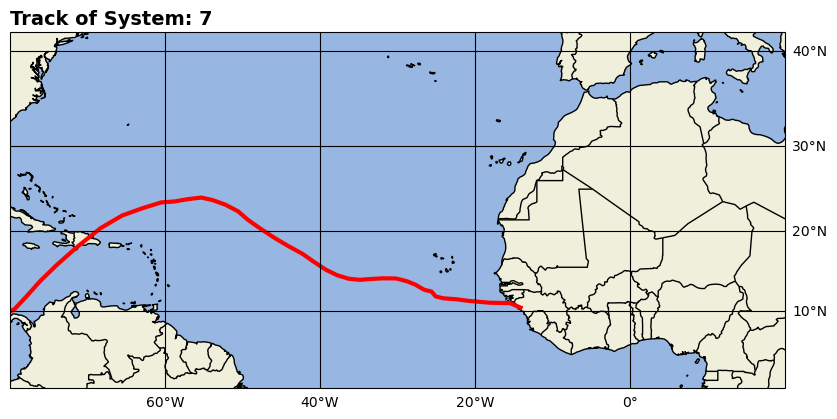

In [8]:
wave_number = 7 #Let's choose lucky number 7!

pull_wave_nc = AEW_xr.sel(system = wave_number) #This selects only the wave number where system == 7

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111, projection = ccrs.Mercator()) ## ccrs.PlateCaree() is more default but wanted to have some fun

ax.plot(pull_wave_nc.AEW_lon_smooth, pull_wave_nc.AEW_lat_smooth, color = 'r', lw = 3,
       transform = ccrs.PlateCarree()) #The transform function takes the lat/lon grid (officially called PlateCarree)
                                       #and is transforming it to the projection of the map (mercator)

## Projection settings
ax.set_title('Track of System: '+str(wave_number), loc = 'left', fontweight = 'bold',
            fontsize = 14)
ax.set_extent([-80, 20, 0, 30])

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'k')
gl.top_labels = False
gl.left_labels = False

# Exercise 1

### Your turn: can you recreate the above plot, but using the AEW object method (not NC file!)?

### Also, modify the cartopy plot to adjust something about the plot! Different projection, adjust ocean/land display, etc.! You can do things like add rivers, draw cities, so forth...

- Should work similarily, but you'll have to extract the latitude and longitude from the AEW object! 
- I suggest using the AEW_lon_smooth and AEW_lat_smooth as they are smoothed lon/lat


Here's a list of all of the available cartopy projections: https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html

## Next, let's try to plot some vorticity alongside AEW locations!

In [9]:
time_in = str(year)+'-8-30-12' #Just picking a date, can change. Here it's 12z on 9-26 for the year we choose
level_in = 700 #hPa. This is the level of data we want to pull from!

### So, we want to select this time in all of our datasets
data_sliced = data_xr[var_to_plot].sel(time = time_in, level = level_in)
AEW_sliced = AEW_xr.sel(time = time_in)

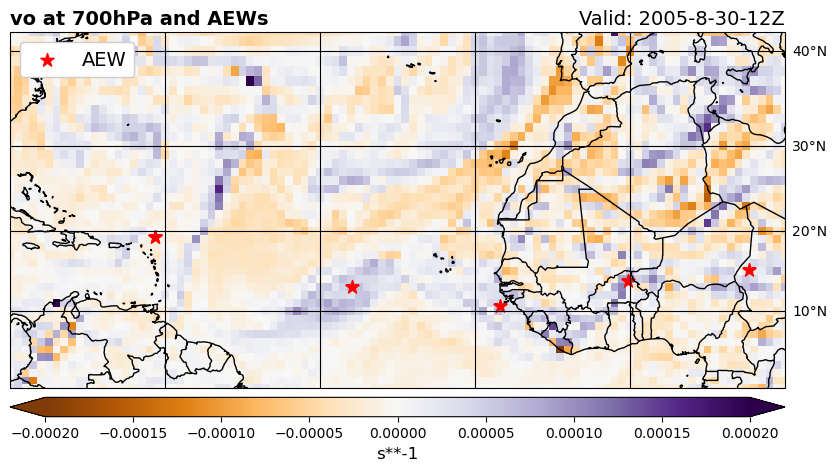

In [10]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111, projection = ccrs.Mercator()) ## ccrs.PlateCaree() is more default but wanted to have some fun


pl = ax.pcolormesh(data_sliced.longitude, data_sliced.latitude, data_sliced, cmap = cmap_in,
           vmin = -2e-4, vmax=2e-4, transform = ccrs.PlateCarree())

AEW_plot = ax.scatter(AEW_sliced.AEW_lon_smooth, AEW_sliced.AEW_lat_smooth, s = 100, 
                      c = 'r', marker = '*', transform = ccrs.PlateCarree(), label = 'AEW')

plt.legend(loc = 'upper left', framealpha = 1, fontsize = 14)

## Projection settings
ax.set_title(var_to_plot+' at '+str(level_in)+'hPa and AEWs', loc = 'left', fontweight = 'bold',
            fontsize = 14)
ax.set_title('Valid: '+time_in+'Z', loc = 'right', fontweight = 'regular',
            fontsize = 14)
ax.set_extent([-80, 20, 0, 30])
cbar = plt.colorbar(pl, orientation = 'horizontal', pad = 0.02, aspect = 40, extend = 'both')
cbar.set_label(data_sliced.units, fontsize = 12)
# ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'k')
gl.top_labels = False
gl.left_labels = False

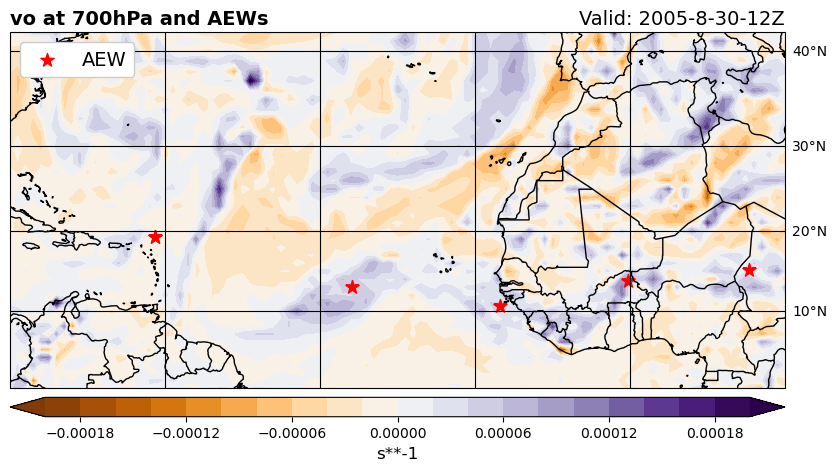

In [11]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111, projection = ccrs.Mercator()) ## ccrs.PlateCaree() is more default but wanted to have some fun

conts = np.linspace(-2e-4, 2e-4, 21)
pl = ax.contourf(data_sliced.longitude, data_sliced.latitude, data_sliced, cmap = cmap_in,
           levels = conts, transform = ccrs.PlateCarree(), extend = 'both')

AEW_plot = ax.scatter(AEW_sliced.AEW_lon_smooth, AEW_sliced.AEW_lat_smooth, s = 100, 
                      c = 'r', marker = '*', transform = ccrs.PlateCarree(), label = 'AEW')

plt.legend(loc = 'upper left', framealpha = 1, fontsize = 14)

## Projection settings
ax.set_title(var_to_plot+' at '+str(level_in)+'hPa and AEWs', loc = 'left', fontweight = 'bold',
            fontsize = 14)
ax.set_title('Valid: '+time_in+'Z', loc = 'right', fontweight = 'regular',
            fontsize = 14)
ax.set_extent([-80, 20, 0, 30])
cbar = plt.colorbar(pl, orientation = 'horizontal', pad = 0.02, aspect = 40, extend = 'both')
cbar.set_label(data_sliced.units, fontsize = 12)
# ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'k')
gl.top_labels = False
gl.left_labels = False

# Exercise 2

### Your turn! Do something similar, but with **another variable** stored on my ERA5_1DEG database

Some suggestions to try:
- specific humidity: '/data/qlawton/ERA5_1DEG/CLIMO/FULL/q/'
- Estimated diabatic heating: '/data/qlawton/ERA5_1DEG/CLIMO/FULL/Q1/'
- omega (rising motion): '/data/qlawton/ERA5_1DEG/CLIMO/FULL/omega/'

Just one of these is fine! Remember you will have to do the following:

    1) Load in the new variable dataset
    2) Slice out the time from this new variable
    3) Adjust the colormap, colorscale, etc. to make it visually appealing!